# libraries 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:



import glob
import cv2
import numpy as np
import matplotlib.pyplot  as plt 
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import precision_score, confusion_matrix,recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [4]:


# read data set


Categories=['upnormal','normal']
flat_data_arr=[]
#input array
target_arr=[]
#output array
datadir='/content/drive/MyDrive/graduation_project/dataset/normalnot' 
 
#path which contains all the categories of images
for i in Categories:
    
   print(f'loading... category : {i}')   
   path=os.path.join(datadir,i) 
   for img in os.listdir(path):  
      img_array=imread(os.path.join(path,img)) 
      img_resized=resize(img_array,(150,150,3)) 
      gray = cv2.cvtColor(np.float32(img_resized), cv2.COLOR_RGB2GRAY)
      flat_data_arr.append(gray)   
      target_arr.append(Categories.index(i))   
      print(f'loaded category:{i} successfully')
      target=np.array(target_arr)


loading... category : upnormal
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upnormal successfully
loaded category:upn

In [5]:
images=[]
for data in flat_data_arr:
      data = data / data.max() #normalizes data in range 0 - 255
      data = 255 * data
      img = data.astype(np.uint8)
      images.append(img)

In [6]:
# Print the confusion matrix using Matplotlib
def cm(y_test, y_pred,name):
 title="confusion matrix of "+ name
 conf_matrix = confusion_matrix(y_test, y_pred)
 fig, ax = plt.subplots(figsize=(5, 5))
 ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
 for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 plt.xlabel('Predictions', fontsize=18)
 plt.ylabel('Actuals', fontsize=18)
 plt.title(title, fontsize=18)
 plt.show()

In [7]:
def performance(y_test, y_pred):
  p= precision_score(y_test, y_pred,average='weighted')
  r=recall_score(y_test, y_pred)
  a=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred)
  return  p,r,a,f1


In [19]:
sobel=[]
def sobelL(img):
      i=(img*255).astype(np.uint8)
      sobelx = cv2.Sobel(i,cv2.CV_64F,1,0,ksize=5)  # x
      sobely = cv2.Sobel(i,cv2.CV_64F,0,1,ksize=5)  # y
      sobel=sobelx+sobely
      return sobel
for i in flat_data_arr:  
    e=sobelL(i)
    sobel.append(e)
  


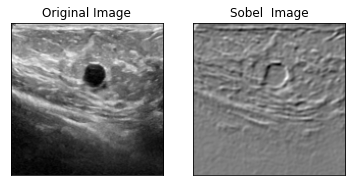

In [20]:
plt.subplot(121),plt.imshow(flat_data_arr[5],cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equalized[5],cmap = 'gray')
plt.title('Sobel  Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
equalized=[]
def equ(img):
  i=(img*255).astype(np.uint8)
  equalization = cv2.equalizeHist(i)
  return equalization
for i in flat_data_arr:  
    e=equ(i)
    equalized.append(e)
  


In [29]:
pip install -U opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
def extract_sift_features(list_image):

    image_descriptors = []
 
    for img in list_image:
        image=np.uint8(img)
        sift = cv2.SIFT_create()
        kp = sift.detect(image,None)
        x=cv2.drawKeypoints(image, kp, image.copy()) 
        image_descriptors.append(x)
        return image_descriptors

flat_data=extract_sift_features(sobel)

In [55]:
x=[]
for i in equalized:
  x.append(i.flatten())
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, target, test_size = 0.3, random_state = 42,stratify=target)
print('Splitted Successfully')

Splitted Successfully


In [56]:

#Feature Scalingfrom sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))

Matrix shape X:  (561, 22500)
561 samples for training
241 samples for testing


In [57]:
print(x[0])

[   0. 3226. 6216. ...  612.  538.    0.]


In [58]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, Y_train)


grid_predictions = classifier.predict(X_test) 


In [59]:
p= precision_score(Y_test, grid_predictions,average='weighted')
r=recall_score(Y_test, grid_predictions,average='weighted')
a=accuracy_score(Y_test, grid_predictions)  

print(p ) 
print(r ) 
print(a )  

0.8738514983038769
0.8838174273858921
0.8838174273858921


In [60]:

parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
'C': [1,2,3,300,500],
'max_iter': [1000,100000]}]


clf = GridSearchCV(
        SVC(), parameters, scoring='accuracy')
clf.fit(X_train, Y_train)

print(clf.best_params_)


grid_predictions = clf.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1

{'C': 2, 'kernel': 'rbf', 'max_iter': 1000}
Accuracy: 0.88


In [61]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf',C=3,max_iter=1000, random_state = 42)
#{'C': 3, 'kernel': 'rbf', 'max_iter': 1000}
classifier.fit(X_train, Y_train)
grid_predictions = classifier.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy: 0.89


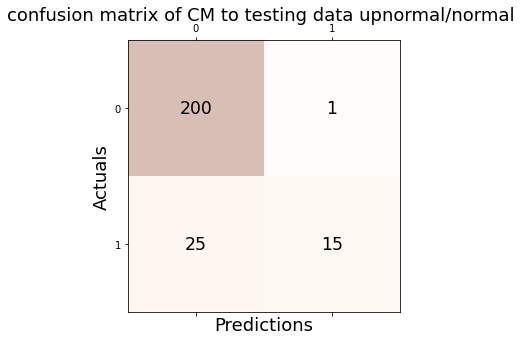

In [62]:
cm(Y_test, grid_predictions,"CM to testing data upnormal/normal ")

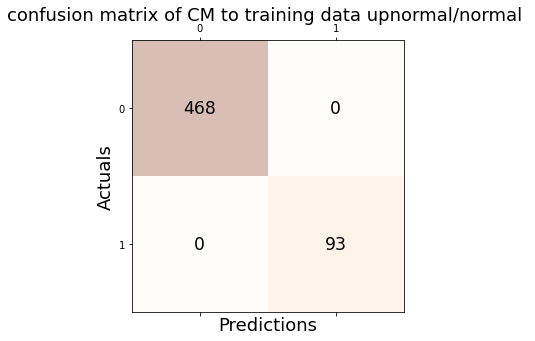

In [63]:
grid_predictionstrain = classifier.predict(X_train)
cm(Y_train, grid_predictionstrain,"CM to training data upnormal/normal ")

In [64]:
print('Accuracy of training: {:.2f}'.format(accuracy_score(Y_train, grid_predictionstrain)*100))
print('Accuracy of testing : {:.2f}'.format(accuracy_score(Y_test, grid_predictions)*100))

Accuracy of training: 100.00
Accuracy of testing : 89.21


In [65]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       201
           1       0.94      0.38      0.54        40

    accuracy                           0.89       241
   macro avg       0.91      0.69      0.74       241
weighted avg       0.90      0.89      0.87       241

